In [267]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance


In [268]:
# Raw dataset
cbb_dataset = pd.read_csv('cbb.csv', index_col=None)
print(cbb_dataset.shape)
display(cbb_dataset)

(3523, 24)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


In [269]:
#--------------------------Step 1: pre-processing the dataset----------------------------------------------------

# labelling rows of data. 1 = Qualified for the NCAA tournament. 0 = Did not Qualify for NCAA tournament
# if postseason = NaN that means team has not made it
classification_labels = []
for index, row in cbb_dataset.iterrows():
    # print(row['TEAM'], row['POSTSEASON'], type(row['POSTSEASON']))
    if type(row['POSTSEASON']) is str:
        classification_labels.append(1)
    else:
        classification_labels.append(0)
cbb_dataset['LABEL'] = classification_labels

display(cbb_dataset)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,LABEL
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,1
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,1
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,1
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,1
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023,0
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023,0
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023,0
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023,0


In [270]:
# --------------- Some sanity checks --------------------------

# the number of entries should be 3523
print("Number of entries in dataset:", len(cbb_dataset))
# There should be a total of 68 (teams qualify per year) times 10 (years that are counted) = 680 teams classified as 1 and the rest should be 0
count_1 = cbb_dataset['LABEL'].value_counts()[1]
count_0 = cbb_dataset['LABEL'].value_counts()[0]
print("Number of team's that have made the tournament over 10 seasons:", count_1)
print("Number of team's that have not made the tournament over 10 seasons:", count_0)
assert count_1 == 680
assert count_1 + count_0 == len(cbb_dataset)

# Buffalo should only have qualified 4 times
buffalo = cbb_dataset.loc[cbb_dataset['TEAM'] == 'Buffalo']
buffalo_1 = buffalo['LABEL'].value_counts()[1]
assert buffalo_1 == 4
print("Number of times Buffalo has qualified for the tournament in the past 10 years:", buffalo_1)


Number of entries in dataset: 3523
Number of team's that have made the tournament over 10 seasons: 680
Number of team's that have not made the tournament over 10 seasons: 2843
Number of times Buffalo has qualified for the tournament in the past 10 years: 4


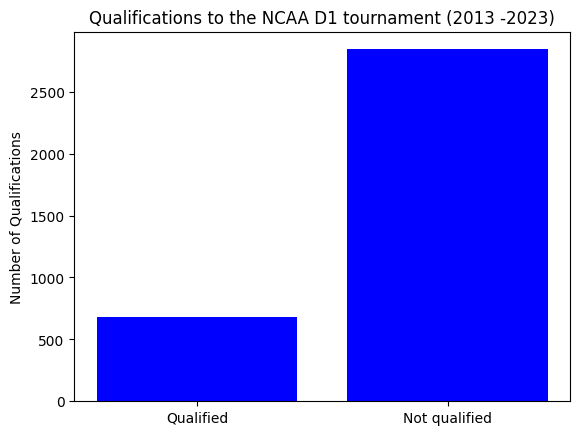

In [271]:
# ------------------- Visualizing Data -------------------
# Total number teams that have made it to the ncaa qualifier over the last 10 seasons 

# Qualifications to the NCAA D1 tournament
quals = {'Qualified': count_1, 'Not qualified': count_0}

qual_labels = ['Qualified', 'Not qualified']
qual_values = [count_1, count_0]

plt.bar(qual_labels, qual_values, color ='blue')
 
plt.ylabel("Number of Qualifications")
plt.title("Qualifications to the NCAA D1 tournament (2013 -2023)")
plt.show()



In [272]:
# selecting only non-ordinal data
feature_cols = [
 'G',
 'W',
 'ADJOE',
 'ADJDE',
 'BARTHAG',
 'EFG_O',
 'EFG_D',
 'TOR',
 'TORD',
 'ORB',
 'DRB',
 'FTR',
 'FTRD',
 '2P_O',
 '2P_D',
 '3P_O',
 '3P_D',
 'ADJ_T',
 ]
non_ordinal_data = cbb_dataset[feature_cols]
class_labels = cbb_dataset.LABEL

display(non_ordinal_data)

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7
1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3
2,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9
3,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5
4,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,18.3,29.8,30.9,34.4,27.5,54.6,52.1,39.7,36.1,69.5
3519,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,18.9,25.3,20.2,26.2,27.8,56.4,48.6,36.4,33.6,64.4
3520,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,16.3,28.9,29.1,35.6,28.7,52.5,42.8,33.4,31.1,69.8
3521,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,19.3,35.8,29.3,35.7,28.9,48.8,47.2,35.6,31.6,70.7


In [273]:
# Displaying general stats for our features
stats = non_ordinal_data.describe()
display(stats)


,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000
mean,30.486233,15.990633,103.151320,103.153250,0.494067,49.887823,50.087113,18.696509,18.625092,29.308544,29.516747,34.529066,34.802555,49.112433,49.289299,34.185580,34.369316,67.735339
std,3.951584,6.572893,7.264859,6.511989,0.255338,3.078505,2.894967,2.104119,2.241067,4.214131,3.234810,5.514264,6.396757,3.400389,3.317012,2.729186,2.435546,3.091703
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.400000,18.400000,19.600000,16.500000,37.700000,37.700000,24.900000,26.100000,57.200000
25%,29.000000,11.000000,98.200000,98.400000,0.281300,47.900000,48.100000,17.300000,17.100000,26.500000,27.300000,30.600000,30.200000,46.800000,47.100000,32.300000,32.700000,65.700000
50%,31.000000,16.000000,102.800000,103.200000,0.475600,49.800000,50.100000,18.600000,18.500000,29.400000,29.500000,34.300000,34.100000,49.000000,49.300000,34.100000,34.300000,67.700000
75%,33.000000,21.000000,107.900000,107.800000,0.714250,51.900000,52.000000,20.000000,20.100000,32.100000,31.700000,38.100000,38.800000,51.300000,51.500000,36.000000,36.000000,69.700000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,40.400000,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000


Text(0.5, 1.0, 'Mean of Continuous Data')

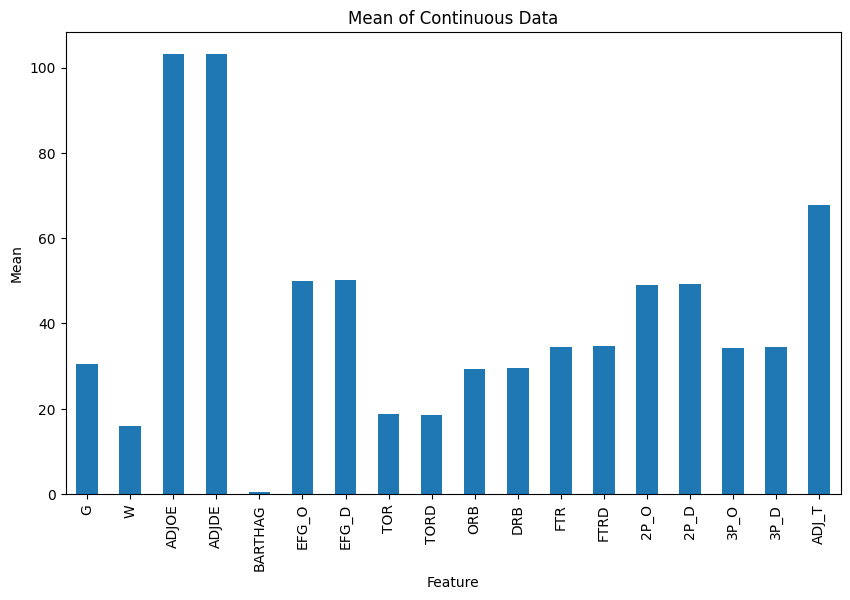

In [274]:
# plotting the mean
mean_of_stats = stats.iloc[1]
ax = mean_of_stats.plot(x='Feature', y='Mean', kind='bar', figsize=(10, 6),  capsize=4)
ax.set_xlabel('Feature')
ax.set_ylabel('Mean')
ax.set_title('Mean of Continuous Data')



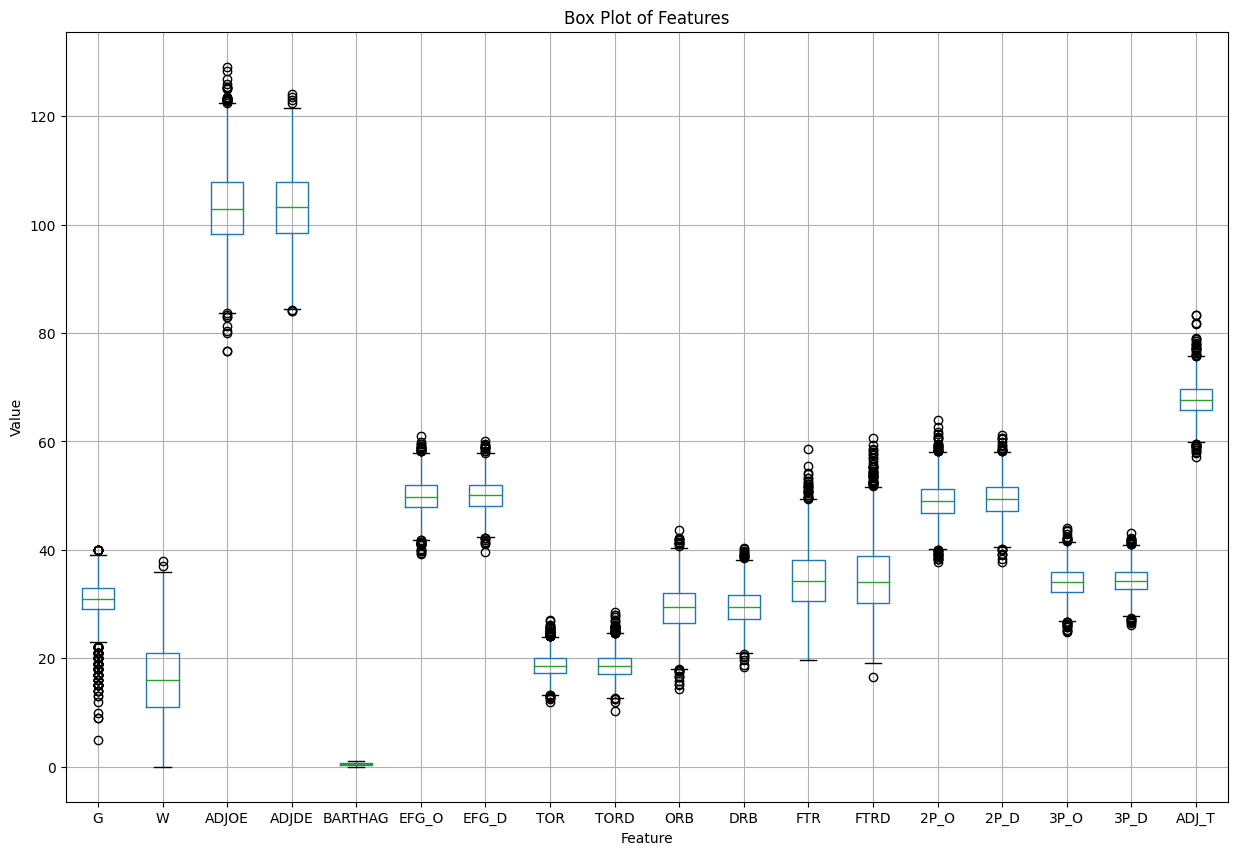

In [275]:
# Box plot of our features
fig = plt.figure(figsize = (15, 10))
ax = non_ordinal_data.boxplot()
ax.set(xlabel='Feature', ylabel='Value', title = 'Box Plot of Features')
plt.show()

In [276]:
# checking for null values
cbb_dataset.isna().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    2843
SEED          2843
YEAR             0
LABEL            0
dtype: int64

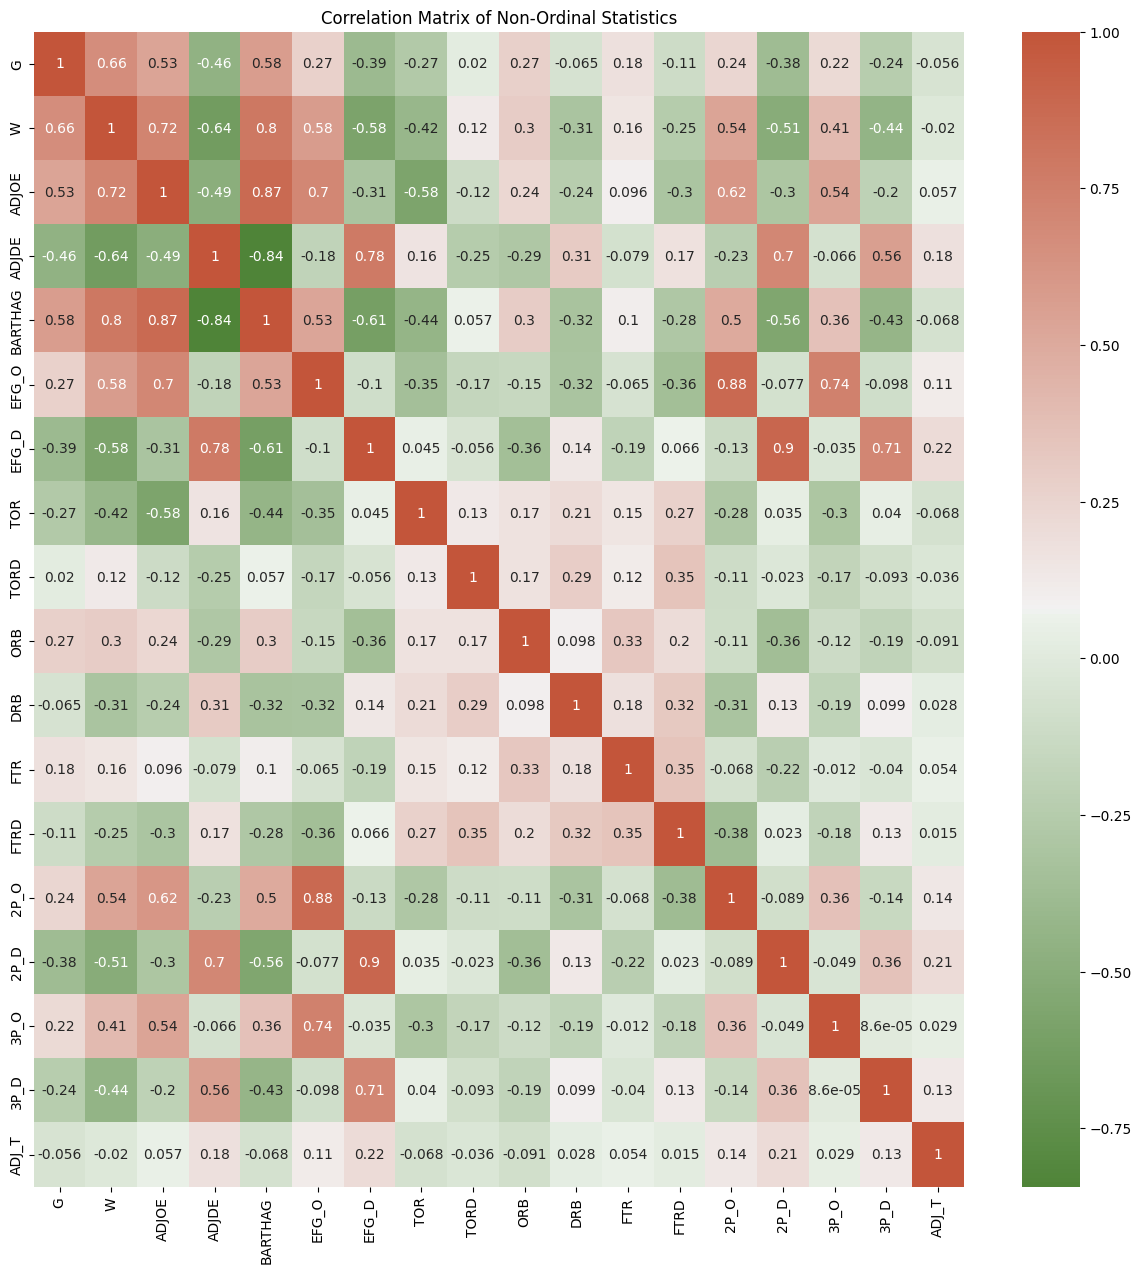

In [277]:
# Printing a correlation matrix for non ordinal data
stat_names = list(non_ordinal_data.columns)
corr = non_ordinal_data.corr(numeric_only=True, method='spearman')
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Correlation Matrix of Non-Ordinal Statistics')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(3000, 20, as_cmap=True), ax = ax)
plt.show()

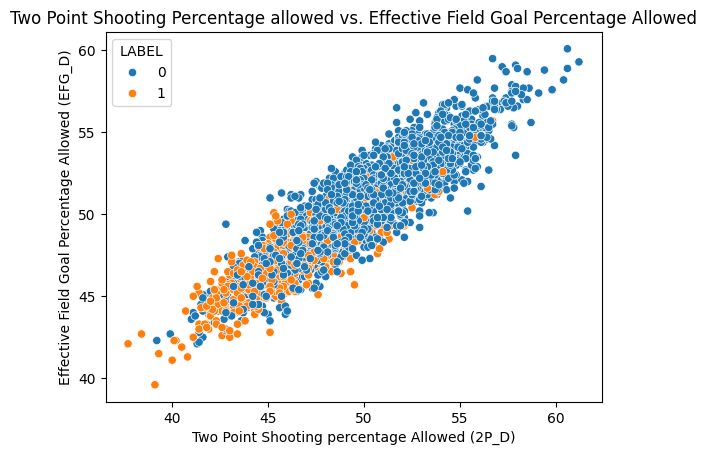

In [278]:
# plotting interesting correlation statistics

# as expected there is a strong positive correlation between these two statistics and teams with higher in both stats are less likely to qualify for the tournament
ax = sns.scatterplot(x='2P_D',y='EFG_D',data=cbb_dataset, hue = 'LABEL')
ax.set(xlabel='Two Point Shooting percentage Allowed (2P_D)', ylabel='Effective Field Goal Percentage Allowed (EFG_D)', title = 'Two Point Shooting Percentage allowed vs. Effective Field Goal Percentage Allowed')
plt.show()

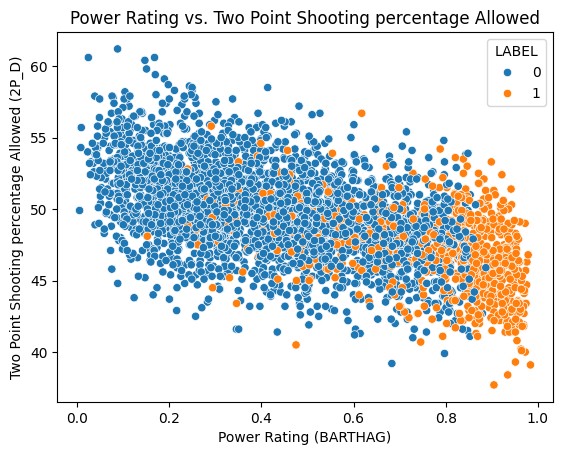

In [279]:
ax = sns.scatterplot(x='BARTHAG',y='2P_D',data=cbb_dataset, hue = 'LABEL')
ax.set(xlabel='Power Rating (BARTHAG)', ylabel='Two Point Shooting percentage Allowed (2P_D)', title = 'Power Rating vs. Two Point Shooting percentage Allowed')
plt.show()

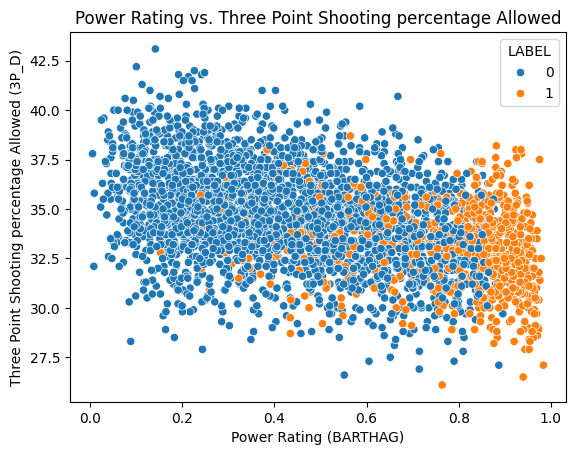

In [280]:
ax = sns.scatterplot(x='BARTHAG',y='3P_D',data=cbb_dataset, hue = 'LABEL')
ax.set(xlabel='Power Rating (BARTHAG)', ylabel='Three Point Shooting percentage Allowed (3P_D)', title = 'Power Rating vs. Three Point Shooting percentage Allowed')
plt.show()

In [281]:
# splitting data into training and testing
cbb_data_train, cbb_data_test, cbb_label_train, cbb_label_test = train_test_split(non_ordinal_data, class_labels, test_size=0.25, random_state=42)


In [282]:
# --------------------- Logistic Regression ---------------------------
logreg = LogisticRegression(random_state=16, max_iter = 1000)
logreg.fit(cbb_data_train, cbb_label_train)
prediction_log_reg = logreg.predict(cbb_data_test)

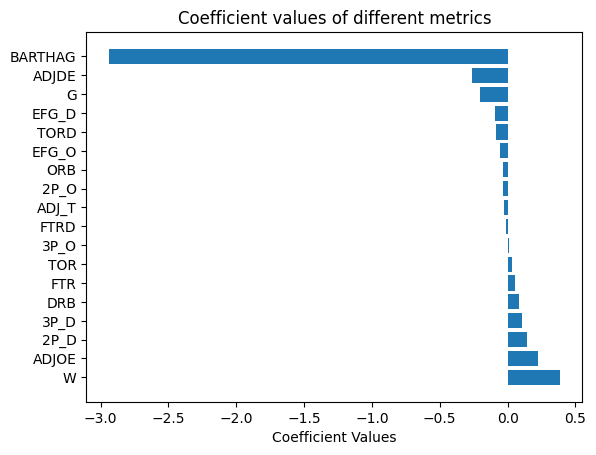

In [283]:
# getting important features using logistic regression coefficients

def visualize_coef_importance(model):
    coefs = model.coef_[0]

    labeled_coefs = list(zip(stat_names, coefs))

    sorted_coefs_tuples = sorted(labeled_coefs, key = lambda x: x[1])
    unzipped_coefs = list(zip(*sorted_coefs_tuples))



    labels_sorted = list(unzipped_coefs[0])
    coefs_sorted = list(unzipped_coefs[1])
    # print(sorted_coefs_tuples)
    # print(labels_sorted)
    # print(coefs_sorted)

    y_pos = np.arange(len(labels_sorted))
    fig, ax = plt.subplots()
    ax.barh(y_pos, coefs_sorted, align='center')
    ax.set_yticks(y_pos, labels=labels_sorted)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Coefficient Values')
    ax.set_title('Coefficient values of different metrics')

    plt.show()

visualize_coef_importance(logreg)


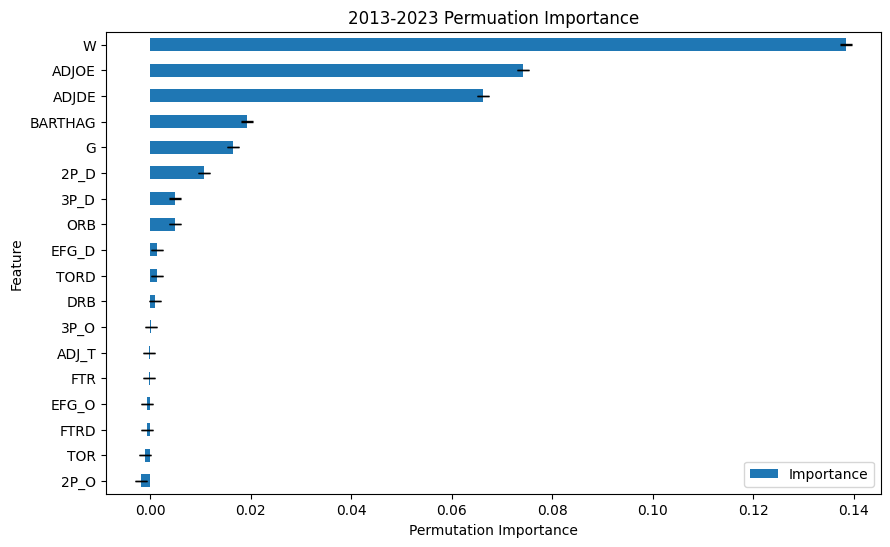

In [297]:
# getting important features using permutation importance 
def visualize_permutation_importance(model, data_test, label_test, stat_names,title):
    result = permutation_importance(model, data_test, label_test, n_repeats=10, random_state=42)


    feature_importance = pd.DataFrame({'Feature': stat_names,
                                    'Importance': result.importances_mean,
                                    'Standard Deviation': result.importances_std})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)


    ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
    ax.set_xlabel('Permutation Importance')
    ax.set_title(title)
    

visualize_permutation_importance(logreg, cbb_data_test, cbb_label_test, stat_names, "2013-2023 Permuation Importance")

In [285]:
# ------------------------ Decision Tree --------------------------------
dt = DecisionTreeClassifier()
dt = dt.fit(cbb_data_train, cbb_label_train)
prediction_decision_tree = dt.predict(cbb_data_test)

In [286]:
# -------------- K Nearest Neighbors ----------------------
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(cbb_data_train, cbb_label_train)
prediction_knn = knn.predict(cbb_data_test)

In [287]:
# ------------------ Support Vector Machines -----------------------
svm = svm.SVC(kernel='linear')
svm.fit(cbb_data_train, cbb_label_train)
prediction_svm = svm.predict(cbb_data_test)

total test size:  881
Logistic Regression Results:


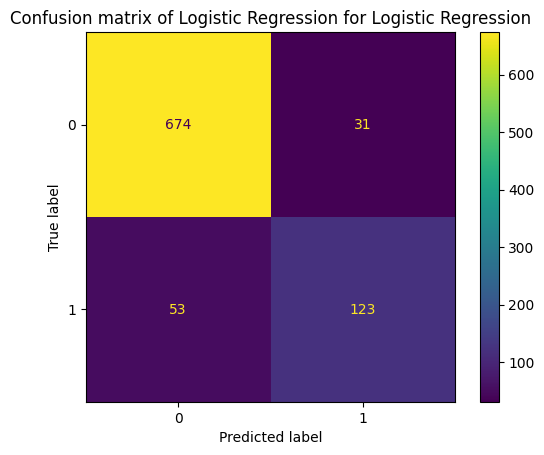

true positives 674
true negatives 123
false positives 31
false negatives 53
                          precision    recall  f1-score   support

    make ncaa tournament       0.93      0.96      0.94       705
not make ncaa tournament       0.80      0.70      0.75       176

                accuracy                           0.90       881
               macro avg       0.86      0.83      0.84       881
            weighted avg       0.90      0.90      0.90       881

Decision Tree Results:


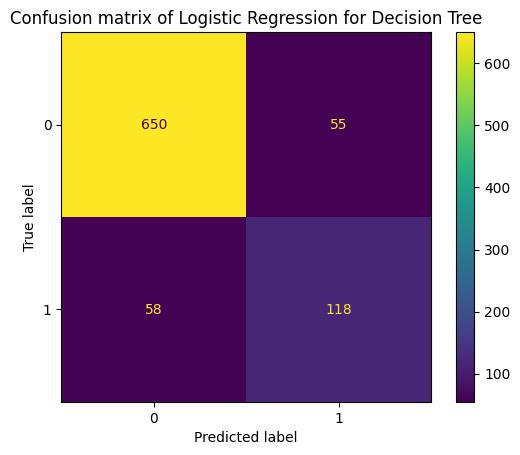

true positives 650
true negatives 118
false positives 55
false negatives 58
                          precision    recall  f1-score   support

    make ncaa tournament       0.92      0.92      0.92       705
not make ncaa tournament       0.68      0.67      0.68       176

                accuracy                           0.87       881
               macro avg       0.80      0.80      0.80       881
            weighted avg       0.87      0.87      0.87       881

K Nearest Neighbors Results:


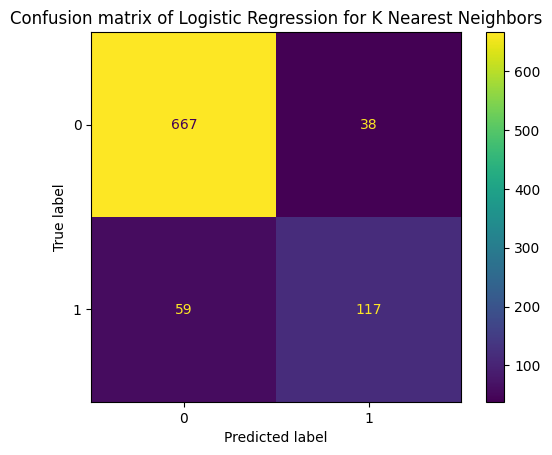

true positives 667
true negatives 117
false positives 38
false negatives 59
                          precision    recall  f1-score   support

    make ncaa tournament       0.92      0.95      0.93       705
not make ncaa tournament       0.75      0.66      0.71       176

                accuracy                           0.89       881
               macro avg       0.84      0.81      0.82       881
            weighted avg       0.89      0.89      0.89       881

Support Vector Machines Results:


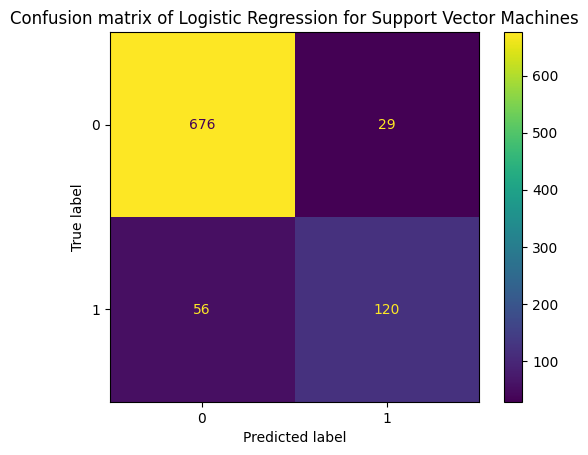

true positives 676
true negatives 120
false positives 29
false negatives 56
                          precision    recall  f1-score   support

    make ncaa tournament       0.92      0.96      0.94       705
not make ncaa tournament       0.81      0.68      0.74       176

                accuracy                           0.90       881
               macro avg       0.86      0.82      0.84       881
            weighted avg       0.90      0.90      0.90       881



In [299]:
#----------------------------------- Comparing Logistic Regression, KNN, SVM, Decision Tree ---------------------
predictions = []
predictions.append(prediction_log_reg)
predictions.append(prediction_decision_tree)
predictions.append(prediction_knn)
predictions.append(prediction_svm)

algo_order = ['Logistic Regression', 'Decision Tree', 'K Nearest Neighbors', 'Support Vector Machines']

i = 0
print("total test size: ", cbb_label_test.shape[0])
for prediction in predictions:
    
    cnf_matrix = metrics.confusion_matrix(cbb_label_test, prediction)
    tp = cnf_matrix[0][0]
    tn = cnf_matrix[1][1]
    fp = cnf_matrix[0][1]
    fn = cnf_matrix[1][0]
    size = tp +tn + fp + fn
    print(algo_order[i] + " Results:")
    # Displaying the confusion matrix
    # display(cnf_matrix)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    disp.plot()
    plt.title("Confusion matrix of Logistic Regression for " + algo_order[i])
    plt.show()
    # print("total test size: ", size)
    print("true positives", tp)
    print("true negatives", tn)
    print("false positives", fp)
    print("false negatives", fn)

    # Displaying Evaluation results
    target_names = ['make ncaa tournament', 'not make ncaa tournament']
    print(classification_report(cbb_label_test, prediction, target_names=target_names))
    i+=1 


Buffalo Logistic Regression Results:


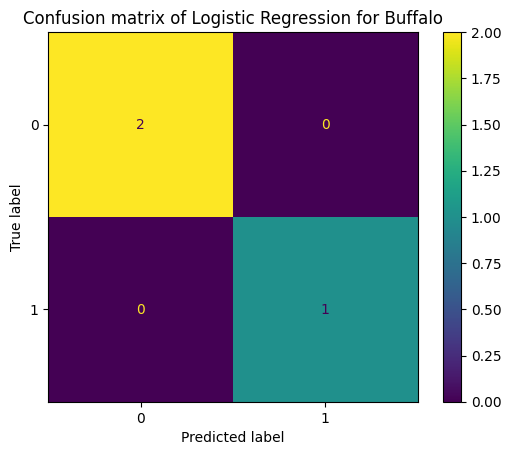

true positives 2
true negatives 1
false positives 0
false negatives 0
                          precision    recall  f1-score   support

    make ncaa tournament       1.00      1.00      1.00         2
not make ncaa tournament       1.00      1.00      1.00         1

                accuracy                           1.00         3
               macro avg       1.00      1.00      1.00         3
            weighted avg       1.00      1.00      1.00         3



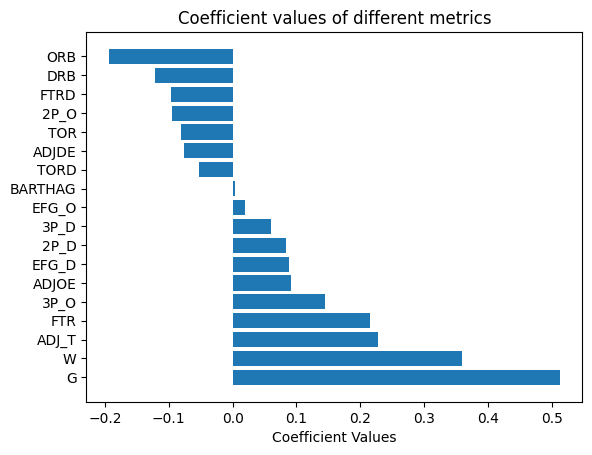

In [294]:
# -------------- Using Logistic Regression on a dataset of Buffalo's Performance over 10 years ----------
# splitting data into training and testing
buffalo = cbb_dataset.loc[cbb_dataset['TEAM'] == 'Buffalo']
buffalo_labels = buffalo.LABEL
non_ordinal_data = buffalo[feature_cols]

non_ordinal_data

buffalo_data_train, buffalo_data_test, buffalo_label_train, buffalo_label_test = train_test_split(non_ordinal_data, buffalo_labels, test_size=0.25, random_state=10)


logreg_buffalo = LogisticRegression(random_state=16, max_iter = 1000)
logreg_buffalo.fit(buffalo_data_train, buffalo_label_train)
prediction_buffalo = logreg_buffalo.predict(buffalo_data_test)

def print_conf_stats(prediction, test_labels, title, name):
    cnf_matrix = metrics.confusion_matrix(test_labels, prediction)
    tp = cnf_matrix[0][0]
    tn = cnf_matrix[1][1]
    fp = cnf_matrix[0][1]
    fn = cnf_matrix[1][0]
    size = tp +tn + fp + fn
    print(title)
    # Displaying the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    disp.plot()
    plt.title("Confusion matrix of Logistic Regression for " + name)
    plt.show()
    # print("total test size: ", size)
    print("true positives", tp)
    print("true negatives", tn)
    print("false positives", fp)
    print("false negatives", fn)

    # Displaying Evaluation results
    target_names = ['make ncaa tournament', 'not make ncaa tournament']
    print(classification_report(test_labels, prediction, target_names=target_names))

print_conf_stats(prediction_buffalo, buffalo_label_test, "Buffalo Logistic Regression Results:", "Buffalo")
# visualize_permutation_importance(logreg_buffalo, buffalo_data_test, buffalo_label_test, stat_names)
visualize_coef_importance(logreg_buffalo)

Seasons 2021-2023 Logistic Regression Results:


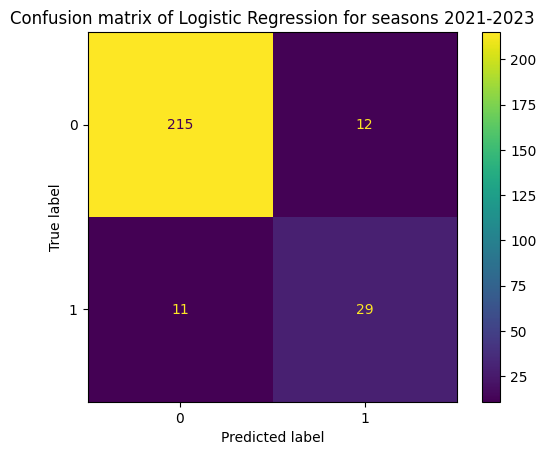

true positives 215
true negatives 29
false positives 12
false negatives 11
                          precision    recall  f1-score   support

    make ncaa tournament       0.95      0.95      0.95       227
not make ncaa tournament       0.71      0.72      0.72        40

                accuracy                           0.91       267
               macro avg       0.83      0.84      0.83       267
            weighted avg       0.91      0.91      0.91       267



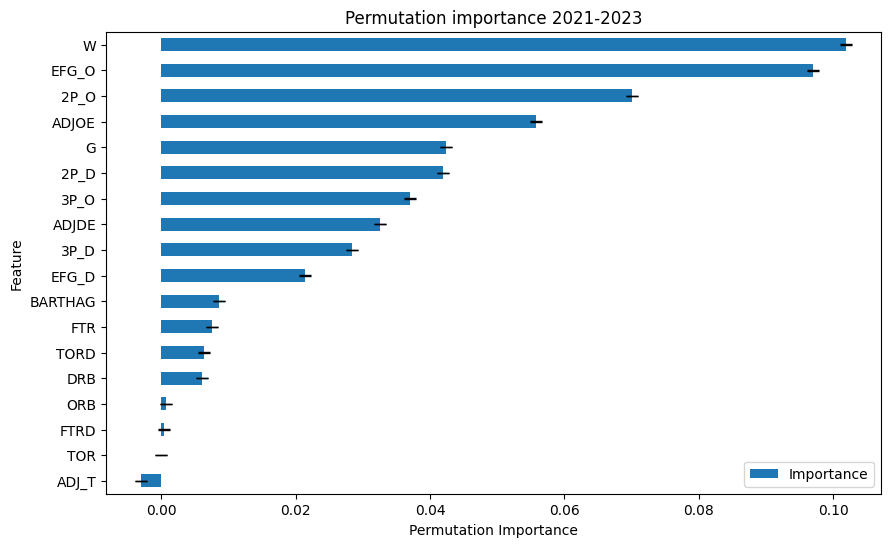

In [298]:
# -------------- Using Logistic Regression on last 3 seasons 2021 - 2023 ----------


lower_limit = 2021
upper_limit = 2023
three_seasons = cbb_dataset.loc[(cbb_dataset["YEAR"] >= lower_limit) & (cbb_dataset["YEAR"] <= upper_limit)]

three_seasons_labels = three_seasons.LABEL
non_ordinal_data = three_seasons[feature_cols]

non_ordinal_data

data_train, data_test, label_train, label_test = train_test_split(non_ordinal_data, three_seasons_labels, test_size=0.25, random_state=10)


logreg_three = LogisticRegression(random_state=16, max_iter = 3000)
logreg_three.fit(data_train, label_train)
prediction_three = logreg_three.predict(data_test)

print_conf_stats(prediction_three, label_test, "Seasons 2021-2023 Logistic Regression Results:", "seasons 2021-2023")
# visualize_coef_importance(logreg_three)
visualize_permutation_importance(logreg_three, data_test, label_test, stat_names, "Permutation importance 2021-2023")


references:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html
https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
https://www.datacamp.com/tutorial/decision-tree-classification-python
https://www.datacamp.com/tutorial/understanding-logistic-regression-python
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?select=cbb21.csv
https://forecastegy.com/posts/feature-importance-in-logistic-regression/